In [1]:
#%load_ext line_profiler

# Read Frosty

In [2]:
import soundfile as sf
import pandas as pd
import numpy as np
myColumns = ['ch1', 'ch2']
sigData = pd.DataFrame( columns=myColumns)

#def bob():
count = 1
chunk = 1024*1024*128 #1024*512
#file = 'Dropouts/Frosty_ORIG24bitClean.wav'
file = 'Dropouts/Frosty.wav'

with sf.SoundFile(file, 'r') as f:
    size = chunk #f.frames #1024 #f.frames
    while f.tell() < size:
        data = f.read(chunk,dtype='int16')
        #if count == 1: 
        #    sigData  = pd.DataFrame(data)
        #    count  += 1      
        #else:
        #    sigData = pd.concat([sigData, pd.DataFrame(data)])
        #    count  += 1 
sigDataFrosty = pd.DataFrame(data)    
sigDataFrosty.reset_index(drop=True)
sigDataFrosty.columns = myColumns
print (sigDataFrosty.iloc[:,0].max(), sigDataFrosty.iloc[:,0].idxmax(), sigDataFrosty.shape)


32767 21535277 (134217728, 2)


In [3]:
sigDataFrosty.max(),sigDataFrosty.idxmax()

(ch1    32767
 ch2    32767
 dtype: int16, ch1    21535277
 ch2    21534287
 dtype: int64)

# Read sigData24  24 bit clean audio

In [4]:
import soundfile as sf
import pandas as pd
import numpy as np
myColumns = ['ch1', 'ch2']
sigData = pd.DataFrame( columns=myColumns)

count = 1
chunk = 1024*1024*128 #1024*512
file = 'Dropouts/Frosty_ORIG24bitClean.wav'
#file = 'Dropouts/0146output.wav'
#file = 'Dropouts/Frosty.wav'

with sf.SoundFile(file, 'r') as f:
    size = chunk #f.frames #1024 #f.frames
    while f.tell() < size:
        data = f.read(chunk,dtype='int16')
        #if count == 1: 
        #    sigData  = pd.DataFrame(data)
        #    count  += 1      
        #else:
        #    sigData = pd.concat([sigData, pd.DataFrame(data)])
        #    count  += 1 
c = pd.DataFrame(data[:,:2])    
sigDataClean24.reset_index(drop=True)
sigDataClean24.columns = myColumns
print (sigDataClean24.iloc[:,0].max(), sigDataClean24.iloc[:,0].idxmax(), sigDataClean24.shape)


32767 16753985 (134217728, 2)


In [5]:
sigDataClean24.max(),sigDataFrosty.idxmax()

(ch1    32767
 ch2    32767
 dtype: int16, ch1    21535277
 ch2    21534287
 dtype: int64)

# Compare Frosty with Frosty Lagged

In [6]:
print (sigDataFrosty.shape, sigDataClean24.shape)

(134217728, 2) (134217728, 2)


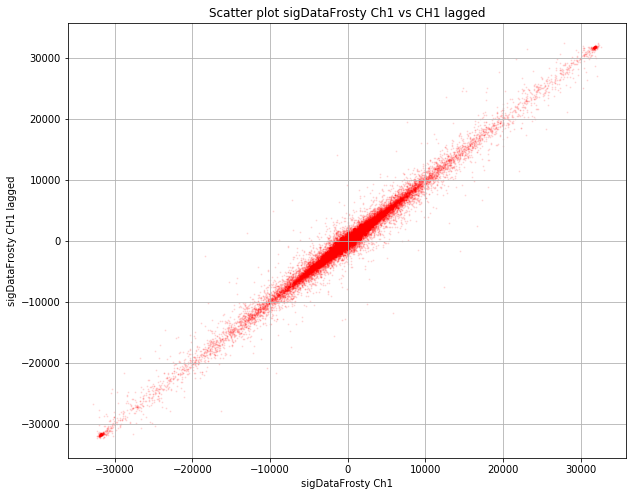

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
l = len(sigDataFrosty.ch1)
skip = int(l/100000)
skip
plt.scatter(sigDataFrosty.ch1[::skip], sigDataFrosty.ch1.shift(3)[::skip], s = 1, alpha = .1, c = 'r')
plt.title('Scatter plot sigDataFrosty Ch1 vs CH1 lagged')
plt.xlabel('sigDataFrosty Ch1')
plt.ylabel('sigDataFrosty CH1 lagged')
plt.grid()
plt.show()

In [8]:
print (len(sigDataFrosty), len(sigDataClean24))

134217728 134217728


In [9]:
l = len(sigDataFrosty.ch1)
skip = int(l/100000)
skip

1342

# Compare Frosty two channels

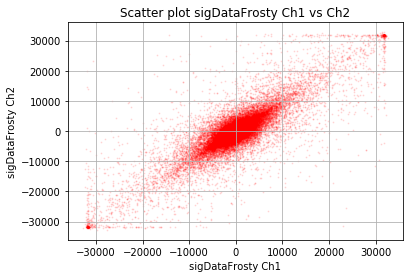

In [10]:
import matplotlib.pyplot as plt
plt.scatter(sigDataFrosty.ch1[::skip], sigDataFrosty.ch2[::skip], s = 1, alpha = .1, c = 'r')
plt.title('Scatter plot sigDataFrosty Ch1 vs Ch2')
plt.xlabel('sigDataFrosty Ch1')
plt.ylabel('sigDataFrosty Ch2')
plt.grid()
plt.show()

# Compare Clean Original Frosty to iteself two channels

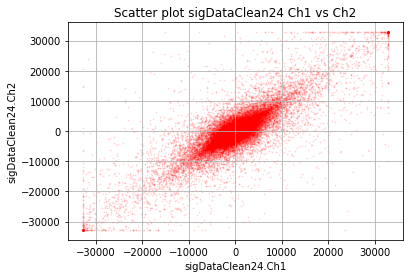

In [11]:
import matplotlib.pyplot as plt
#skip = 1
plt.scatter(sigDataClean24.ch1[::skip], sigDataClean24.ch2[::skip], s = 1, alpha = .1, c = 'r')
plt.title('Scatter plot sigDataClean24 Ch1 vs Ch2')
plt.xlabel('sigDataClean24.Ch1')
plt.ylabel('sigDataClean24.Ch2')
plt.grid()
plt.show()

# Compare Frosty to sigDataClean24 channel 1

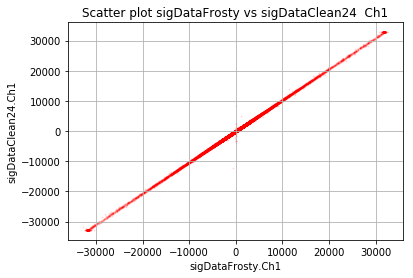

In [12]:
import matplotlib.pyplot as plt
plt.scatter(sigDataFrosty.ch1[::skip], sigDataClean24.ch1[::skip], s = 1, alpha = .1, c = 'r')
plt.title('Scatter plot sigDataFrosty vs sigDataClean24  Ch1')
plt.xlabel('sigDataFrosty.Ch1')
plt.ylabel('sigDataClean24.Ch1')
plt.grid()
plt.show()

# Compare two files - Frosty and sigDataClean24 channel 2

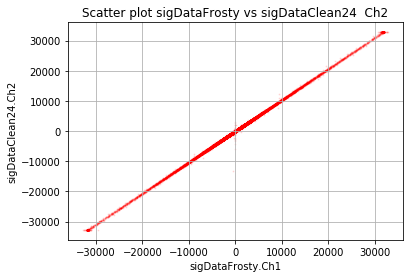

In [13]:
import matplotlib.pyplot as plt
plt.scatter(sigDataFrosty.ch2[::skip], sigDataClean24.ch2[::skip], s = 1, alpha = .1, c = 'r')
plt.title('Scatter plot sigDataFrosty vs sigDataClean24  Ch2')
plt.xlabel('sigDataFrosty.Ch1')
plt.ylabel('sigDataClean24.Ch2')
plt.grid()
plt.show()

In [14]:
sigDataFrosty.max(), sigDataFrosty.idxmax()

(ch1    32767
 ch2    32767
 dtype: int16, ch1    21535277
 ch2    21534287
 dtype: int64)

# Plot region of multiple injected zeros

In [60]:

start_index = 28839212 #2883609 #1922198 #1441781 #731075 #490835
start = start_index # 28839152                   
start = start - 8000
end = start + 9000 #373989616 #start + 12000  #373989616

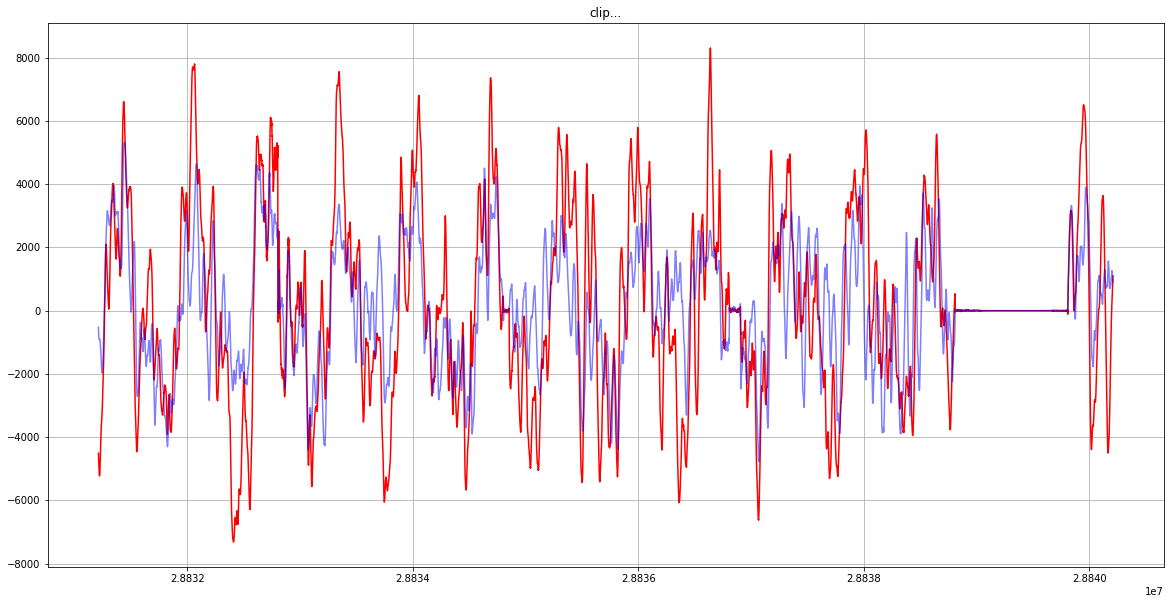

In [64]:
%matplotlib inline

decade = 0 #.28  #2.6
start = int(decade*100000000) + 490681  #39152 #839152  #901051  #901091 #420599
start = start_index # 28839152                   
start = start - 8000
end = start + 9000 #373989616 #start + 12000  #373989616

channel = 1
clip = sigDataFrosty[start:end]
Time = np.linspace(start,end-1,end-start) 
#bins = numpy.linspace(-np.power(2,15), np.power(2,15)-1,  256)
#clipq = numpy.digitize(clip, bins)
#clipq = normalize(clip[:,np.newaxis], axis=0).ravel()

%matplotlib inline
#Plot
plt.figure(figsize=(20,10)) 
plt.title('clip...')
plt.plot(Time,clip.ch1,c='red')
plt.plot(Time,clip.ch2,c='blue', alpha = .5)
plt.grid()
plt.show()

# Zoom in and plot a narrow range of sample of dropouts

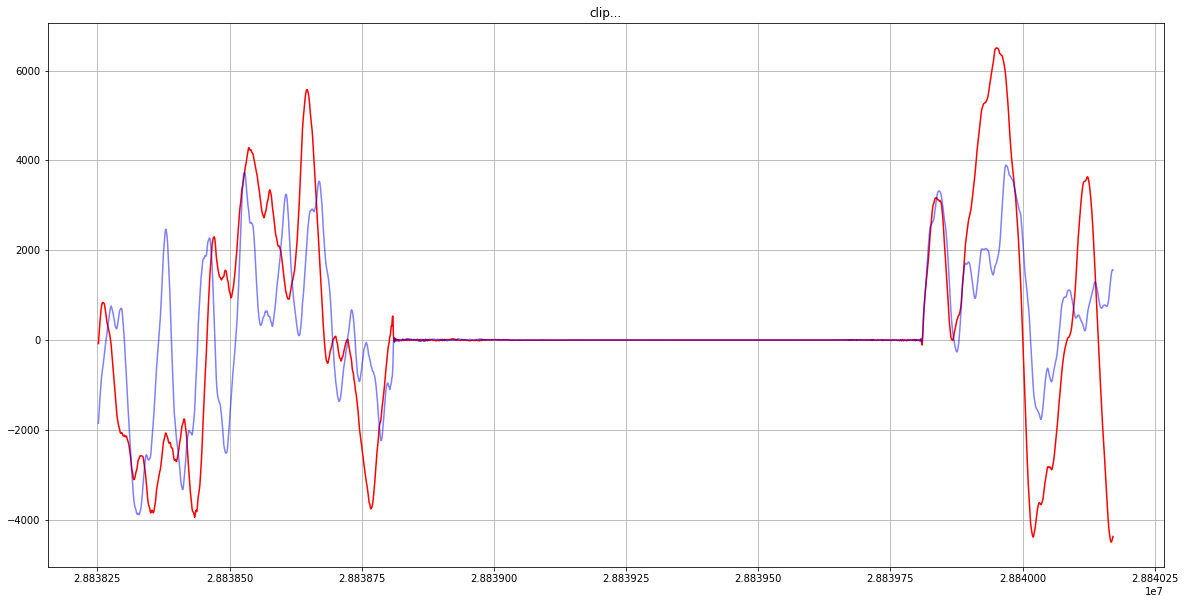

In [79]:
%matplotlib inline
#from sklearn.preprocessing import normalize
before = 2 #keep for demo
start = start_index - before * 480 -0  #keep for demo
channel = 2
end = start +  2 * before * 480  #keep for demo

clip = sigDataFrosty[start:end]
Time = np.linspace(start,end-1,end-start) 
#bins = numpy.linspace(-np.power(2,15), np.power(2,15)-1,  256)
#clipq = numpy.digitize(clip, bins)
#clipq = normalize(clip[:,np.newaxis], axis=0).ravel()

%matplotlib inline
#Plot
plt.figure(figsize=(20,10)) 
plt.title('clip...')
plt.plot(Time,clip.ch1,c='red')
plt.plot(Time,clip.ch2,c='blue', alpha = .5)
plt.grid()
plt.show()

# Runlength computation

In [21]:
def RunLengthDictionaryIndex(clip):
    d = {}
    count = 1
    LastVal = None
    Lastndex = 0
    for i,v in enumerate(clip):
        if v == LastVal:
            count += 1
            d[Lastndex] = (v,count)
        else:
            count = 1            
            d[i] = (v,count)
            Lastndex = i
        LastVal = v
    return d

def RunLengthDictionaryValue(clip):
    d = {}
    count = 1
    LastVal = None
    LastIndex = 0
    di = {}
    for i,v in enumerate(clip):
        if v == LastVal:
            if i > LastIndex:
                count += 1
                di[i] = count
                d[v][-1] = (LastIndex,count)
        else:
            count = 1
            if len(d) > 0:
                if v in d.keys():
                    di[i] = count
                    d[v].append((i,count))
                else: 
                    di[i] = count
                    d[v] = [(i,di[i])]
            else:
                di[i] = count
                d[v] = [(i,di[i])]
            LastIndex = i
            LastVal = v       
    return d

In [24]:
lo = 0; hi = 30*1000*1000
RL1 = RunLengthDictionaryValue(sigDataFrosty.ch1[lo:hi].values == 0)
for item in RL1[True]:
    if item[1] > 20:
        print(item)

(490835, 337)
(731075, 316)
(731392, 24)
(1441781, 40)
(1441826, 372)
(1922198, 29)
(1922228, 331)
(2883609, 24)
(2883643, 24)
(2883668, 21)
(2883692, 2007700)
(4891443, 116)
(4891594, 473)
(4892090, 257)
(4892356, 455)
(4892827, 771)
(4893616, 590)
(4894217, 65)
(4894326, 144)
(4894518, 34)
(4894598, 252)
(4894870, 197)
(4895123, 237)
(4895387, 141)
(4895541, 325)
(4895878, 45)
(4895976, 63)
(4896103, 41)
(4896220, 41)
(4896334, 47)
(4896447, 32)
(4896540, 156)
(4896709, 121)
(4896881, 64)
(4897021, 35)
(4897083, 107)
(4897205, 131)
(4897400, 37)
(4897540, 30)
(4897642, 146)
(4897861, 25)
(4897985, 38)
(4898076, 191)
(4898342, 55)
(4898542, 153)
(4898780, 22)
(4898904, 172)
(4899141, 27)
(4899264, 40)
(4899440, 185)
(4899727, 46)
(4899860, 36)
(4899988, 51)
(4900213, 65)
(4900342, 22)
(4900431, 53)
(4900559, 40)
(4900657, 36)
(4900753, 43)
(4900852, 111)
(4901046, 21)
(4901150, 31)
(4901239, 109)
(4901379, 84)
(4901504, 31)
(4901593, 52)
(4901691, 367)
(4902135, 27)
(4902200, 150)
(49

In [80]:
lo = 0; hi = 30*1000*1000
RL1 = RunLengthDictionaryValue(sigDataClean24.ch1[lo:hi].values == 0)
for item in RL1[True]:
    if item[1] > 20:
        print(item)

(2882878, 1921920)
(4877504, 59)
(4877669, 36)
(4878249, 56)
(4878462, 105)
(4878702, 38)
(4878974, 143)
(4879434, 72)
(4879585, 31)
(4880044, 82)
(4880276, 66)
(4880352, 129)
(4880798, 28)
(4880832, 97)
(4881278, 129)
(4881750, 97)
(4882160, 62)
(4882266, 38)
(4882498, 69)
(4882673, 96)
(4882979, 58)
(4883104, 66)
(4883444, 74)
(4883642, 107)
(4883929, 66)
(4884190, 74)
(4884406, 130)
(4884681, 52)
(4884957, 78)
(4885147, 23)
(4885323, 112)
(4885734, 80)
(4886059, 90)
(4886240, 81)
(4886580, 129)
(4886851, 50)
(4887031, 106)
(4887201, 41)
(4887573, 108)
(4887781, 40)
(4887980, 90)
(4888261, 65)
(4888456, 35)
(4888569, 59)
(4888706, 78)
(4888909, 65)
(4889141, 101)
(4889374, 61)
(4889444, 55)
(4889624, 78)
(4889837, 89)
(4890089, 86)
(4890255, 150)
(4890566, 198)
(4890859, 23)
(4890993, 63)
(4891087, 123)
(4891275, 65)
(4891518, 130)
(4891737, 86)
(4891991, 133)
(4892178, 121)
(4892469, 252)
(4892725, 21)
(4892920, 111)
(4893088, 102)
(4893501, 185)
(4893873, 160)
(4894055, 37)
(489417

# Plot low volume region both channels Frosty

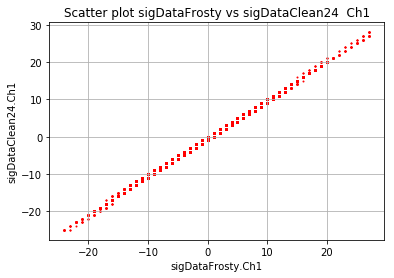

In [83]:
import matplotlib.pyplot as plt
plt.scatter(sigDataFrosty.ch1[4900000:5000000], sigDataClean24.ch1[4900000:5000000], s = 1,  c = 'r')
plt.title('Scatter plot sigDataFrosty vs sigDataClean24  Ch1')
plt.xlabel('sigDataFrosty.Ch1')
plt.ylabel('sigDataClean24.Ch1')
plt.grid()
plt.show()

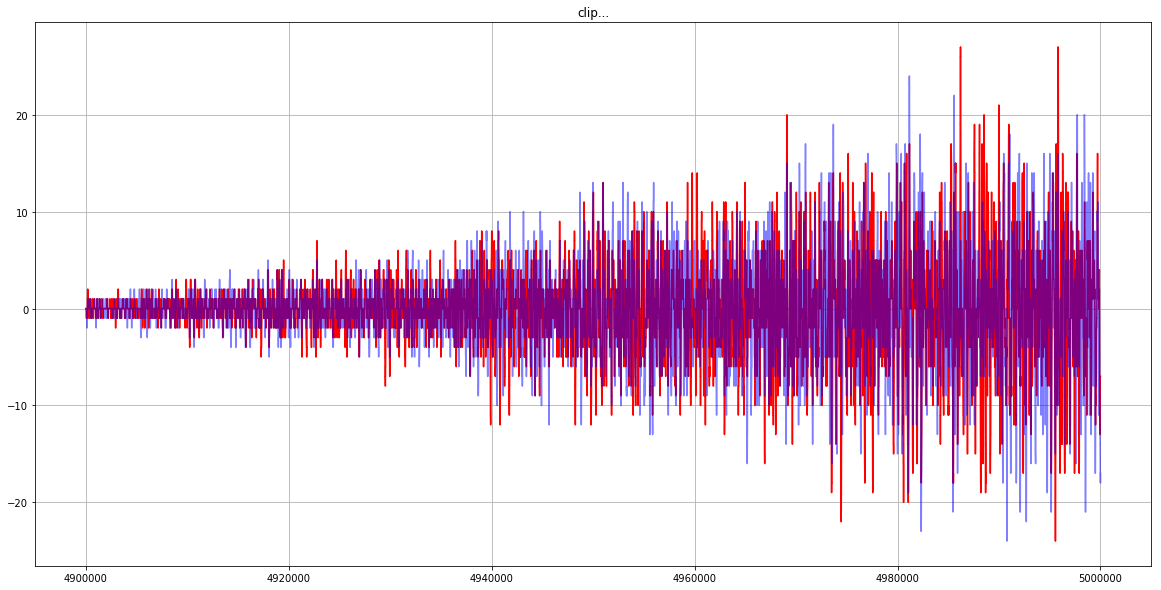

In [93]:
%matplotlib inline
#from sklearn.preprocessing import normalize
start = 4900000 
end =  5000000 
channel = 2


clip = sigDataFrosty[start:end]
Time = np.linspace(start,end-1,end-start) 
#bins = numpy.linspace(-np.power(2,15), np.power(2,15)-1,  256)
#clipq = numpy.digitize(clip, bins)
#clipq = normalize(clip[:,np.newaxis], axis=0).ravel()

%matplotlib inline
#Plot
plt.figure(figsize=(20,10)) 
plt.title('clip...')
plt.plot(Time,clip.ch1,c='red')
plt.plot(Time,clip.ch2,c='blue', alpha = .5)
plt.grid()
plt.show()

# Plot low volume region sigDataFrosty vs sigDataClean24

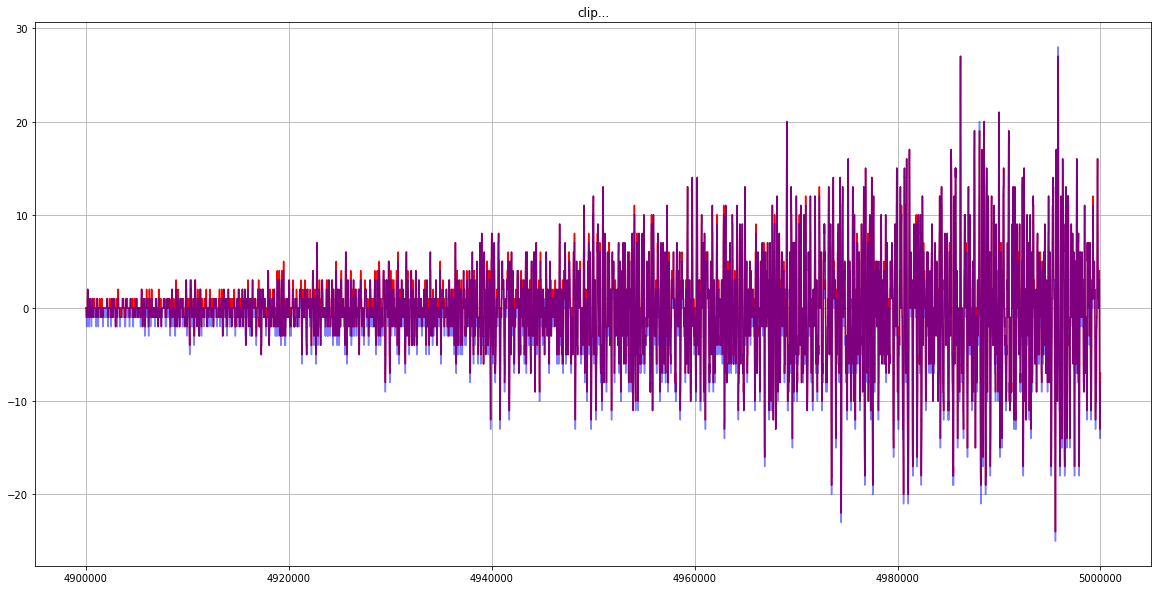

In [94]:
%matplotlib inline
#from sklearn.preprocessing import normalize
start = 4900000 
end =  5000000 
channel = 2


clip = sigDataFrosty[start:end]
Time = np.linspace(start,end-1,end-start) 
#bins = numpy.linspace(-np.power(2,15), np.power(2,15)-1,  256)
#clipq = numpy.digitize(clip, bins)
#clipq = normalize(clip[:,np.newaxis], axis=0).ravel()

%matplotlib inline
#Plot
plt.figure(figsize=(20,10)) 
plt.title('clip...')
plt.plot(Time,clip.ch1,c='red')
#plt.plot(Time,clip.ch2,c='blue', alpha = .5)
plt.plot(Time,sigDataClean24.ch1[start:end],c='blue', alpha = .5)
plt.grid()
plt.show()